In [352]:
import numpy as np
import pandas as pd
# Import seaborn as sb
import matplotlib.pyplot as plt
# Classifer
from sklearn.tree import DecisionTreeClassifier


# Show DecisionTree
from sklearn.tree import export_graphviz 
from io import StringIO 
from IPython.display import Image, display
import pydotplus

# Analysis
# Accuary
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_val_score
# Confuison Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn
# Precision & recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# F1 Score
from sklearn.metrics import f1_score
# Sensivitivity & Specificity
    #Use the confusion matrix
# ROC & UAC

# Clasification inform
from sklearn.metrics import classification_report

#Export model
import pickle

# Evaluador de los modelos

In [5]:
#Accuaracy
#Matriz de confucion
    #https://pypi.org/project/pandas-ml/
    #https://datatofish.com/confusion-matrix-python/
#Precision & recall
    #https://www.askpython.com/python/examples/precision-and-recall-in-python
#F1 Score
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
#Sensivity & spicifity
    #https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/
    #Good information
#ROC curve and AUC
    #https://www.statology.org/plot-roc-curve-python/
    

#----------------------------
#extra
#Informe de clasificacion
    # https://pharos.sh/vision-general-de-los-metodos-de-clasificacion-en-python-con-scikit-learn/

#Probability Calibration curves
    #https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py
    #https://dzone.com/articles/logistic-regression-vs-decision-tree#:~:text=Logistic%20Regression%20assumes%20that%20the%20data%20is%20linearly,not%20sure%2C%20then%20go%20with%20a%20Decision%20Tree.
    #https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py


# Accuracy
Fonction definition:

In [6]:
def Accuracy(Y_pred, Y_test):
    print("Accuracy:", metrics.accuracy_score(Y_pred, Y_test))

# Confusion matrix

In [7]:
def Confusion_Matrix(Y_pred, Y_test):
    conf_mat = confusion_matrix(Y_pred, Y_test)
    print('\033[1m' + 'Confusion matrix:' + '\033[0m',"\n",conf_mat)
    print("True negative (TN):  ",conf_mat[0,0])
    print("False positive(FP): ",conf_mat[0,1])
    print("False negative(FN): ",conf_mat[1,0])
    print("True positive (TP):  ",conf_mat[1,1])

    CM = pd.crosstab(Y_pred, Y_test, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(CM, annot=True)
    plt.show()

# Precision & recall

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def PrecisionAndRecall(Y_pred, Y_test, model, X_Test):
    print('\033[1m' + 'Precision and Recall : ' + '\033[0m',"\n")
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    print("Precision: ", precision)
    print("Recall: ", recall)
    
    disp = plot_precision_recall_curve(model, X_Test, Y_test)

# F1 Score

In [9]:
from sklearn.metrics import f1_score
def F1( Y_pred, Y_test):
    print('\033[1m' + 'F1 : ' + '\033[0m',"\n")
    #Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    f1_macro = f1_score(Y_test, Y_pred, average='macro')
    #Calculate metrics globally by counting the total true positives, false negatives and false positives.
    f1_micro = f1_score(Y_test, Y_pred, average='micro')
    #Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
    #This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
    f1_weighted = f1_score(Y_test, Y_pred, average='weighted')
    #General
    f1_general = f1_score(Y_test, Y_pred, zero_division=1)
    #Multi-label
    f1_multi = f1_score(Y_test, Y_pred, average=None)
    #formule basic:
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    F1 = 2 * (precision * recall) / (precision + recall)
    print("F1 Macro:      ", f1_macro)
    print("F1 Micro:      ", f1_micro)
    print("F1 Weighted:   ", f1_weighted)
    print("F1 General:    ", f1_general)
    print("F1 Multi_label:", f1_multi)
    print("F1:            ", F1)

In [10]:
def SensAndSpeci(Y_pred, Y_test):
    print('\033[1m' + 'Sensitivity & Specifity: ' + '\033[0m',"\n")
    cm = confusion_matrix(Y_pred, Y_test)
    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    print('Sensitivity : ', sensitivity1 )
    
    specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    print('Specificity : ', specificity1)

In [11]:
def ROCandAUC(Y_pred, Y_test, model, x_test):
    print('\033[1m' + 'ROC & AUC: ' + '\033[0m',"\n")
    probs = model.predict_proba(x_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    auc = metrics.roc_auc_score(Y_test, Y_pred)
    
    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Informe de clasificacion

In [12]:
 from sklearn.metrics import classification_report
def Inform(Y_pred,Y_test):
    print('\033[1m' + 'Classification report:' + '\033[0m',"\n")
    target_names = ['Batch 0', 'Batch 1']
    print(classification_report(Y_test, Y_pred, target_names=target_names))

# All parameters

In [13]:
def Evaluate(Y_pred, Y_test, model, X_test):
    #Classification report
    Inform(Y_pred, Y_test)
    #Confusion Matrix
    Confusion_Matrix(Y_pred, Y_test)
    #Precision and Recall
    PrecisionAndRecall(Y_pred, Y_test, model, X_test)
    #F1
    F1(Y_pred, Y_test)
    #Sensitivity & Specifity
    SensAndSpeci(Y_pred, Y_test)
    #ROC & AUC
    ROCandAUC(Y_pred, Y_test, model, X_test)
    #print("Working...")

# Data normalizated

In [14]:
def Data(Name):
    df = pd.read_csv(Name)
    #Normalize: QM Check Urgent = 0, QM Check Needed = 1, None = 2, PSF = 3 and SF = 4 
    dfc = df.copy()
    
    for i in range(len(df)):
        if dfc['WebsitePriority'][i] == 'QM Check Urgent':
            dfc.loc[i,'WebsitePriority'] = 0
        if dfc['WebsitePriority'][i] == 'QM Check Needed':
            dfc.loc[i,'WebsitePriority'] = 1
        if dfc['WebsitePriority'][i] == 'None':
            dfc.loc[i,'WebsitePriority'] = 2
        if dfc['WebsitePriority'][i] == 'PSF':
            dfc.loc[i,'WebsitePriority'] = 3
        if dfc['WebsitePriority'][i] == 'SF':
            dfc.loc[i,'WebsitePriority'] = 4
    print('Getting data...')
    New_df = dfc
    return New_df

# Decision trees

In [15]:
def FirstDT(model, features):
    export_graphviz(model, 'tree.dot', feature_names = features)
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = features,class_names=['0','1'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('tree.png')
    display(Image(graph.create_png()))

In [16]:
def SecondDT(model, features):
    export_graphviz(model, 'tree_2.dot', feature_names = features)
    dot_data_2 = StringIO()
    export_graphviz(model, out_file=dot_data_2,  
                    filled=True, rounded=True,
                    special_characters=True,feature_names = features,class_names=['0','1'])
    graph_2 = pydotplus.graph_from_dot_data(dot_data_2.getvalue())  
    graph_2.write_png('tree_2.png')
    print('\033[1m' + 'Second DT' + '\033[0m',"\n")
    display(Image(graph_2.create_png()))

In [17]:
def ThirdDT(model, features):
    export_graphviz(model, 'tree_3.dot', feature_names = features)
    dot_data_3 = StringIO()
    export_graphviz(model, out_file=dot_data_3,
                    filled=True, rounded=True,
                    special_characters=True,feature_names = features,class_names=['0','1'])
    graph_3 = pydotplus.graph_from_dot_data(dot_data_3.getvalue())  
    graph_3.write_png('tree_3.png')
    print('\033[1m' + 'Third DT' + '\033[0m',"\n")
    display(Image(graph_3.create_png()))

In [383]:
def Inf_Model(model):
    M = model.feature_importances_
    L_values = M[M>0]
    L_index = list(np.array(np.where(M>0))[0,:])
    Ad = []
    for i in range(len(L_index)):
        Ad.append(All_features[L_index[i]])
    plt.subplots(figsize = (10, 5))
    plt.bar(Ad, L_values)
    print("Percentage of influence on the model of the parameters.")
    plt.show()

# Model creation

In [378]:
def CreateModel(Name, mod = 'All', show_tree = True):
    """
    Returns the model and features of the selected model. Within this function an important parameter 'WebsitePriority' 
    is normalized and it is important to normalize this to numbers because if this is not done, then the training cannot 
    be performed.\n
    Parameters:
    -Name: name of the file to take the training values.
    -show: boolean to show the model evaluation.
    -show_tree: boolean to show the decision trees.
    -mod: desired model, default is the subjective one but there are 4 options, All, General, PCA and subjective.
        ->'All' generates all but when evaluating the input data, it will do it with the general model. But there is 
        the possibility to show the analysis of the three models.
        ->'General' will do the analysis with the general model.
        ->'Subjetive_1' will do the analysis with a subjective model. Characteristics: ....
        ->'Subjetive_2' will do the analysis with a subjective model. Characteristics: ....
        ->'None' sends you the general model back and does not allow you to show any decision tree or model analysis
    -
    """
    #All the features but without 'ID', 'DateReceived' 'Website' 'DateSent' and 'TeamLead_Encoded'[because there are empty data]
    #So we took the decision to quit out the component bc we have just 132 data.
    All_features = ['URLCount','R1Time', 'CrawlIssues', 'WebReviewDif','WebsitePriority'
                ,'ErrorCount', 'R2Time', 'TeamLeadSBQ', 'QMSBQ', 'CxPending'
               ,'CxComplete', 'TotalSBQ', 'Sent', 'Title', 'Brand'
               ,'MFR', 'BC', 'Color', 'Size', 'IPQ'
               ,'UC', 'Model', 'UPC', 'MPN', 'WebExtractionDif'
               ,'SloppyError', 'IncorrectVariant', 'NewEdgeCase', 'IncorrectGuidance', 'Other?'
               ,'Was it a PSF?', 'MXQA_Encoded',  'QM_Encoded', 'Month_Encoded'
               ,'DP_Encoded']
    #print(df)
    #features = ['URLCount','R1Time', 'CrawlIssues', 'ErrorCount', 'R2Time', 'IncorrectGuidance']
    
    # 15 Characteristics.
    features_2 = ['URLCount','R1Time', 'CrawlIssues', 'WebReviewDif','WebsitePriority'
                ,'ErrorCount', 'R2Time', 'TeamLeadSBQ', 'QMSBQ', 'CxPending'
               ,'CxComplete', 'TotalSBQ',  'WebExtractionDif'
               ,'MXQA_Encoded',  'QM_Encoded', 'Month_Encoded',]
    
    #The difference is that I use parameters that do not have a large variation.
    features_3 = ['URLCount','R1Time', 'CrawlIssues', 'WebReviewDif','WebsitePriority'
                ,'ErrorCount', 'R2Time', 'TeamLeadSBQ','WebExtractionDif'
                  ,  'QM_Encoded', 'Month_Encoded']
    
    
    print('Creating model with all the features without ID, DateReceived, Website, DateSent and TeamLead_Encoded...')
    
    # Assigning the data base
    data_base = Data(Name)
    #max_attributes = len(list(data_base))
    
    # Splip data
    # Usually it is: 70/30
    f_train = data_base[:round(len(data_base)*0.7)]
    
    # We create 3 differents... All_features, with teh data of PCA and a subjetive model(base in our experience).
    #features = features
    
    x   = f_train.loc[:,All_features]    
    x_2 = f_train.loc[:,features_2]    
    x_3 = f_train.loc[:,features_3]
    
    y = f_train.loc[:, 'Batch Status']
        
    # Transform_To_array
    # Each one has his own features(array)
    x_array_train   = x.to_numpy()
    x_array_train_2 = x_2.to_numpy()
    x_array_train_3 = x_3.to_numpy()
    
    # It is the same for all
    y_array_train = y.to_numpy()
    
    max_attributes = len(list(data_base))
    # Model
    model     = DecisionTreeClassifier(max_depth=max_attributes)
    model.fit(x_array_train, y_array_train)
    
    
    model_2   = DecisionTreeClassifier(max_depth=len(features_2), random_state=15)
    model_2.fit(x_array_train_2, y_array_train)
    
    model_3   = DecisionTreeClassifier(max_depth=len(list(features_3)), random_state=15)
    model_3.fit(x_array_train_3, y_array_train)
    
    print('Working in the model...')
    # Model Evaluation
    if mod == 'All':
        if show_tree:
            FirstDT(model, All_features)
            SecondDT(model_2, features_2)
            ThirdDT(model_3, features_3)
        return model, All_featurres
        
    if mod == 'General':
        if show_tree:
            FirstDT(model, All_features)
            Inf_Model(model)
        return model, All_features
        
    if mod == 'Subjetive_1':
        if show_tree:
            SecondDT(model_2, features_2)
            Inf_Model(model_2)
        return model_2, features_2
        
    if mod == 'Subjetive_2':
        if show_tree:
            ThirdDT(model_3, features_3)
            Inf_Model(model_3)
        return model_3, features_3
    #Return the model and 
        return model, All_features
    

In [379]:
def Evaluate_TestData(Name, mod = 'subjetive_1', show_tree = False):
    #Add function description
    """
    The function receives the name of the file with the example data and evaluates the input data with the model you 
    select or by default the subjective model and show you the analysis of the model with the input data.
    Parameters:
    -Name: Name of the file
    -show_model: boolean to show the model evaluation.
    -show_tree: boolean to show the decision trees.
    -mod: desired model, default is the subjective one but there are 4 options, All, General, PCA and subjective.
        ->'All' generates all but when evaluating the input data, it will do it with the general model. But there is 
        the possibility to show the analysis of the three models.
        ->'General' will do the analysis with the general model.
        ->'Subjetive_1' will do the analysis with a subjective model. Characteristics: ....
        ->'Subjetive_2' will do the analysis with a subjective model. Characteristics: ....
        ->'None' sends you the general model back and does not allow you to show any decision tree or model analysis
    """
    model, features = CreateModel('TrainingSet.csv', mod = mod, show_tree=show_tree)
    data = Data(Name)
    
    # Test
    X_test = data.loc[:, features]
    y_test = data.loc[:, 'Batch Status']
    # Prediction
    y_pred = model.predict(X_test)
    print('\033[1m' + 'Analisis de resultados de los datos de entrada:' + '\033[0m',"\n")
    
    # Evaluate
    Evaluate(y_pred, y_test, model, X_test)
    print('Finish')
    

In [386]:
import pickle

#CreateModel('TrainingSet.csv', mod = 'Subjetive_2', show_tree = True)
#with open('Model' + ".pkl","wb") as out:
#    pickle.dump(Model, out, -1)

Creating model with all the features without ID, DateReceived, Website, DateSent and TeamLead_Encoded...
Getting data...
Working in the model...
Getting data...
Analisis de resultados de los datos de entrada: 

Classification report: 

              precision    recall  f1-score   support

     Batch 0       0.88      0.95      0.91        66
     Batch 1       0.95      0.86      0.90        66

    accuracy                           0.91       132
   macro avg       0.91      0.91      0.91       132
weighted avg       0.91      0.91      0.91       132

Confusion matrix: 
 [[63  9]
 [ 3 57]]
True negative (TN):   63
False positive(FP):  9
False negative(FN):  3
True positive (TP):   57


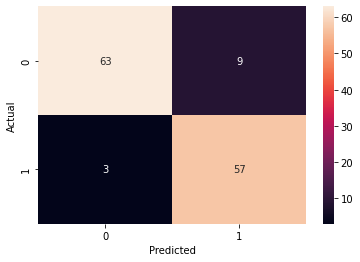

Precision and Recall :  

Precision:  0.95
Recall:  0.8636363636363636
F1 :  

F1 Macro:       0.9089026915113871
F1 Micro:       0.9090909090909091
F1 Weighted:    0.9089026915113871
F1 General:     0.9047619047619048
F1 Multi_label: [0.91304348 0.9047619 ]
F1:             0.9047619047619048
Sensitivity & Specifity:  

Sensitivity :  0.875
Specificity :  0.95
ROC & AUC:  



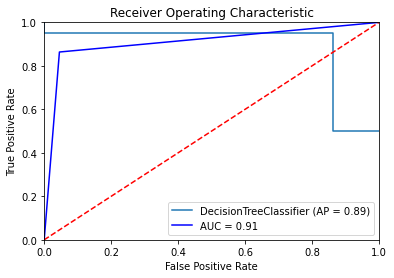

Finish


In [387]:
#Evaluar los datos que Sebas tenga
#Evaluate_TestData('TrainingSet.csv', mod = 'Subjetive_1', show_tree = False)